In [63]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np
import seaborn as sns

data_dir = r'/Users/tanmay/Desktop/JOB/Calls/MLB/data/ds2/'

In [116]:
df = pd.read_csv(r'/Users/tanmay/Desktop/JOB/Calls/MLB/ds2.csv')

In [117]:
df = df.iloc[:,1:]

In [118]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,23.778224,13.319974,15.565124,-3.713626,7.296793,-19.371013,-0.894130,-6.110282,-28.959316,2.851336
1,16.602950,23.311281,21.099052,-0.304154,-3.218990,2.357643,12.027277,7.070349,-5.762185,-23.050198
2,12.084683,19.710443,9.837102,-1.081918,-1.201942,9.738019,16.125920,19.119391,-15.582122,-12.292535
3,13.044534,10.749040,5.884407,-11.703525,-4.134358,-22.344666,-1.263349,0.493711,-15.305347,6.799087
4,8.314115,6.748794,5.388535,-0.000290,-4.724787,-16.346812,3.293600,-10.848273,-17.285491,6.034214


In [123]:
variance = pd.DataFrame(df.var()).T
variance.index=['variance']

skewness = pd.DataFrame(df.skew()).T
skewness.index=['skewness']

df_summary = round(pd.concat([variance, skewness, df.describe()]),2)
df_summary.to_csv(data_dir+'summary_stats.csv')
df_summary

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
variance,143.32,44.29,97.25,112.89,77.45,236.41,108.70,97.64,78.87,211.24
skewness,-0.81,-0.11,-0.59,-0.00,0.12,-0.10,-0.03,-0.20,0.43,0.13
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,8.68,11.72,9.25,-2.68,2.77,0.08,8.20,8.71,-12.86,-1.34
std,11.97,6.66,9.86,10.63,8.80,15.38,10.43,9.88,8.88,14.53
min,-25.82,-8.50,-23.67,-29.43,-22.03,-35.26,-21.43,-16.81,-36.07,-36.47
25%,0.23,7.16,2.65,-10.65,-4.10,-14.00,-0.81,1.48,-19.43,-13.22
50%,12.75,11.90,11.42,-2.63,2.48,1.50,8.53,9.63,-14.42,-2.09
75%,17.36,16.28,16.50,5.34,9.66,14.05,17.14,16.08,-6.53,10.56
max,32.27,32.91,31.23,26.42,29.31,31.73,32.08,36.85,13.55,32.64


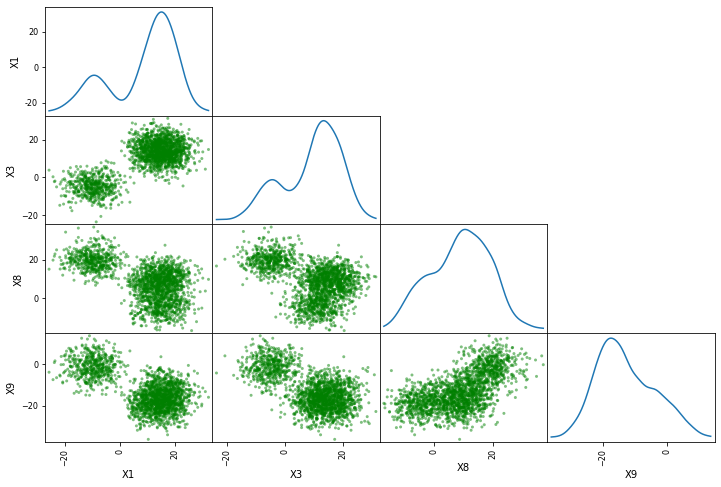

In [130]:
axes = pd.plotting.scatter_matrix(df[['X1','X3','X8','X9']], figsize=(12,8), c= ['g'], diagonal='kde')

for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if i < j:
            axes[i,j].set_visible(False)

In [70]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [71]:
X = df.index.values.reshape(1,-1)
Y = df

In [72]:
nc = np.arange(1,10)
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

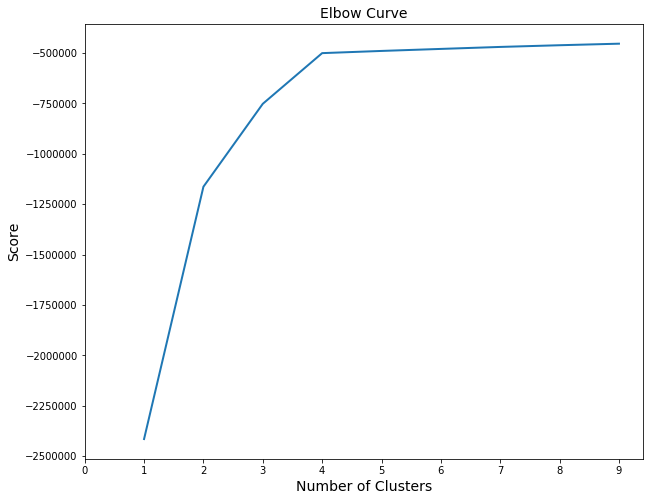

In [73]:
plt.figure(figsize=(10,8))
plt.plot(nc,score, linewidth = 2)
plt.xlabel('Number of Clusters', size=14)
plt.ylabel('Score', size=14)
plt.title('Elbow Curve', size=14)
plt.xticks(np.arange(10))
plt.show()

In [74]:
pca = PCA(n_components=1).fit(Y)
pca_d = pca.transform(Y)
pca_c = pca.transform(X.T)

In [75]:
kmeans=KMeans(n_clusters=4)
kmeansoutput=kmeans.fit(Y)

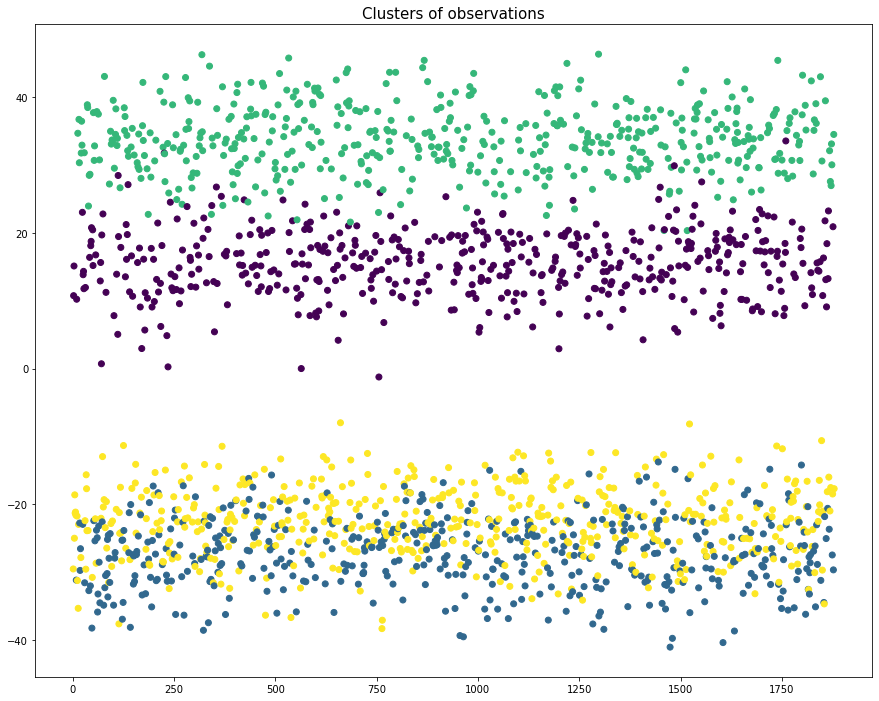

In [76]:
plt.figure(figsize=(15,12))

plt.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
plt.title('Clusters of observations'
          , fontsize = 15)
plt.show()

In [135]:
df['source'] = kmeans.labels_

In [136]:
df['source'] = df['source']+1

In [150]:
for i in set(df['source']):
    df[df['source']==i][:-1].to_csv(data_dir + 'Source_'+str(i) +'.csv', index=False)

In [151]:
df.to_csv(data_dir + 'all_data.csv', index=False)